<a href="https://colab.research.google.com/github/chalsai/Regression-Analysis-with-Python-/blob/main/Week_6_Regression_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform multiple linear regression to predict the price of a house. Make sure to check for assumptions.

### b) Defining the Metric for Success

The project will be a success when we are able to create a multiple linear regression model that fits at least 80% of the training data.

### c) Understanding the Context 

Knightly Frankly is an estate agency, residential and commercial property consultancy
founded in London by John Knight, Howard Frank and William Rutley in 1896.
Together with its New York-based affiliate Newmark, Knightly Frankly is one of the
world's largest global property consultancies.
As a data scientist working for the agency, you have been put to task to help develop a
solution that would allow the agency to price its properties.

### d) Recording the Experimental Design

1. Load datasets and libraries
2. Clean data
3. Perform univariate and bivariate analysis
4. Check that the assumptions of multiple linear regression aren't violated
5. Perform multiple linear regression
6. Summarize findings
7. Provide recommendations
8. Challenge the solution

### e) Data Relevance

The dataset provided is appropriate and relevant to the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [84]:

# Import Libraries

# Basic Libraries
import numpy as np
import pandas as pd
# Visualization Libraries
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats

pd.set_option('display.max.columns', None)


# Classification and Regression Algorithm Libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


%matplotlib inline
sns.set()


In [85]:
house = pd.read_csv('https://bit.ly/2Ww3f6sPropertiesDs')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [86]:
# check dataset shape
house.shape

(21613, 21)

In [87]:
# chekc data types
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We will drop the 'id' and 'date' variables and then drop any duplicated values so that it will be easier to work with the dataset.

In [88]:
# dropping duplicates, if any
house.drop_duplicates(inplace = True)
house.shape

(21613, 21)

In [89]:
# check for missing data
house.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [90]:
# Previewing the statistical summary of our dataset
# 
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


There are no missing values.

## <font color='#2F4F4F'>3. Data Analysis</font>

For our analysis, we will check the assumptions of multiple linear regression which include:
1. There must be a linear relationship between the independent variables and the target variable.
2. Few or no outliers.
3. Little to no multicollinearity.
4. Homoscedasticity - variance of error terms must be similar across the independent variables.
5. All residuals must be normally distributed. 

### 3.1 Checking linearity

In [91]:
# create list to store column names to test against 'price'
house_columns = house.columns.to_list()
house_columns.remove('price')
len(house_columns)

20

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac2e15cd90>,
      dtype=object)

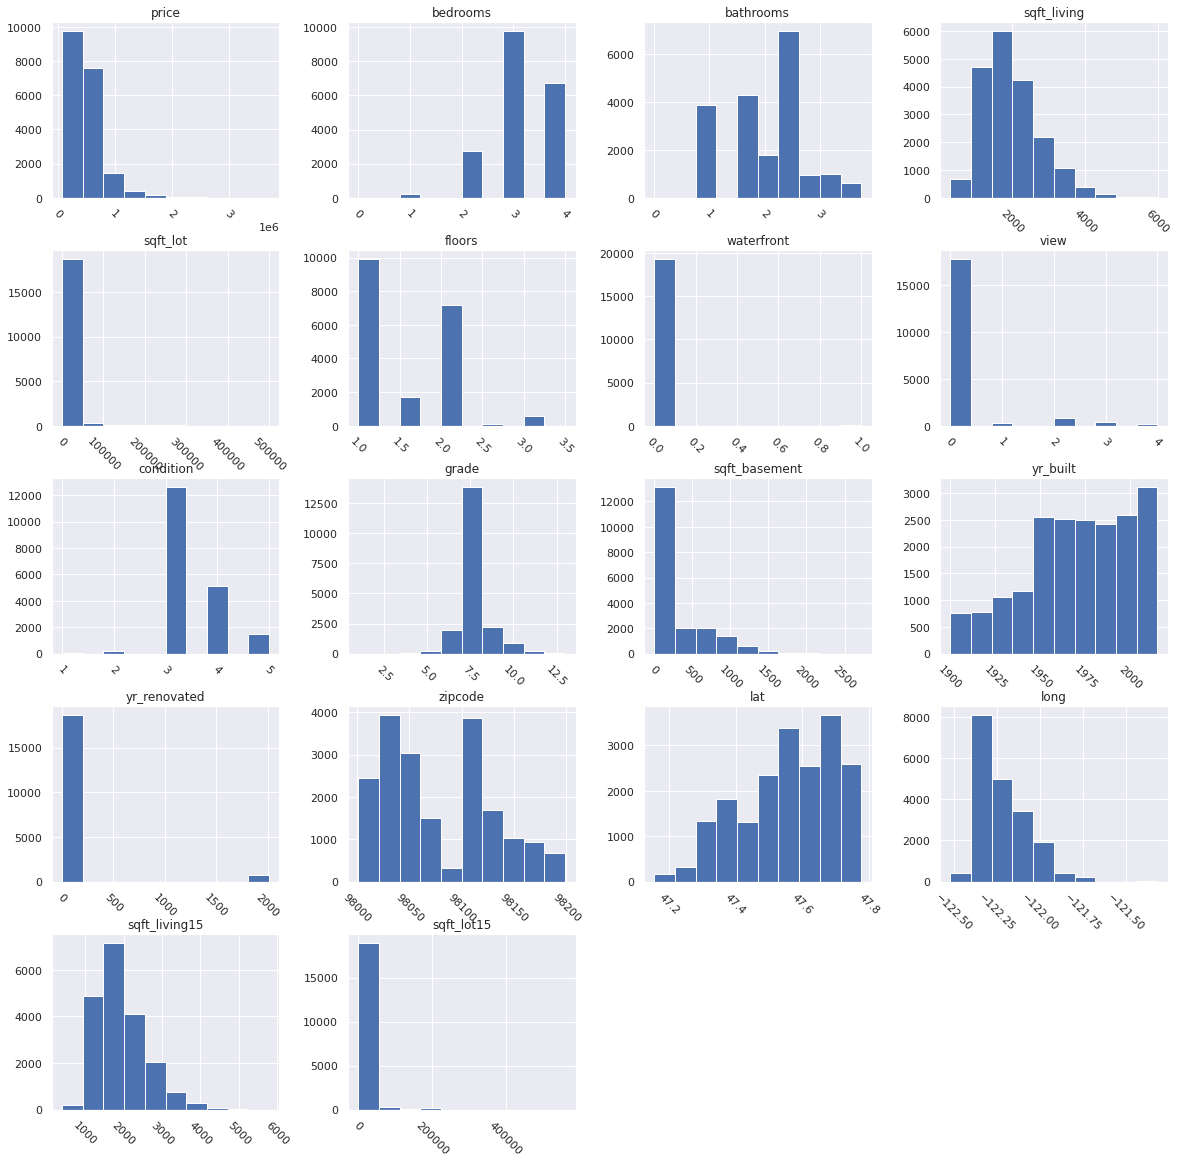

In [80]:
df1.hist(figsize=(20,20), xrot=-45)

Text(0.5, 1.0, 'Price vs Square Feet')

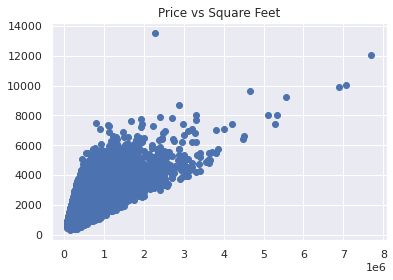

In [92]:
plt.scatter(house.price,house.sqft_living)
plt.title("Price vs Square Feet")

- No house with 0 basement

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

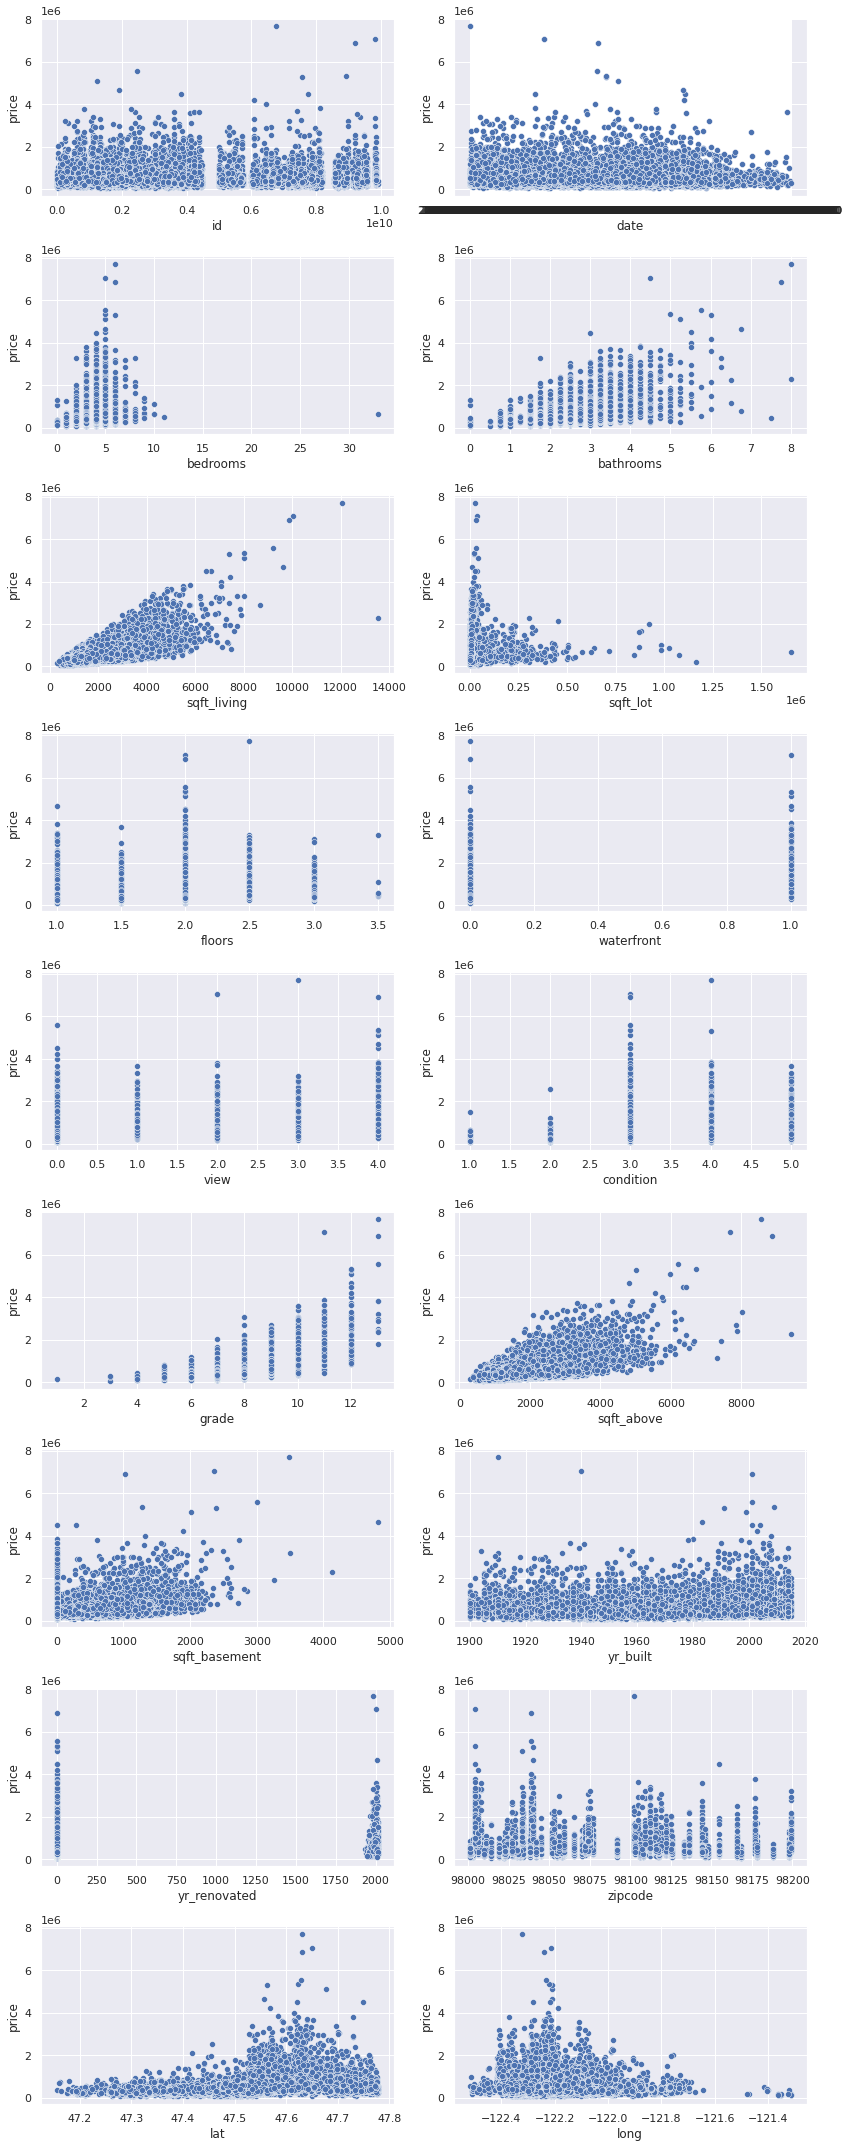

In [93]:
# creating scatterplots to observe the relationship between price and the variables
fig, axes = plt.subplots(nrows = 9, ncols = 2, figsize = (12, 30))

for ax, col in zip(axes.flatten(), house_columns):
    sns.scatterplot(house[col], house['price'], ax = ax)
    plt.xlabel("{}".format(col))
    plt.ylabel("price")
    
plt.tight_layout()

**What have you noticed? What will you do next?**





- When the Sqft of the house is low the price also goes down
- The scatter plots above shows the relation between the house price and other features. Some features as the linear relationship with price like bedrooms, bathrooms,sqft_living. It's interesting that sqft_lot doesn't seem to have that relationship. The plots also show the relationship of the categorical variables.

### 3.2 Checking for outliers

In [94]:
#Remove unwanted column
df1 = house.drop(['id','date'],axis=1)

# Generate New Column Rating based on House Grading
df1['Rating'] = ['Good' if x < 7 else 'Excellent' for x in df1['grade']] 

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

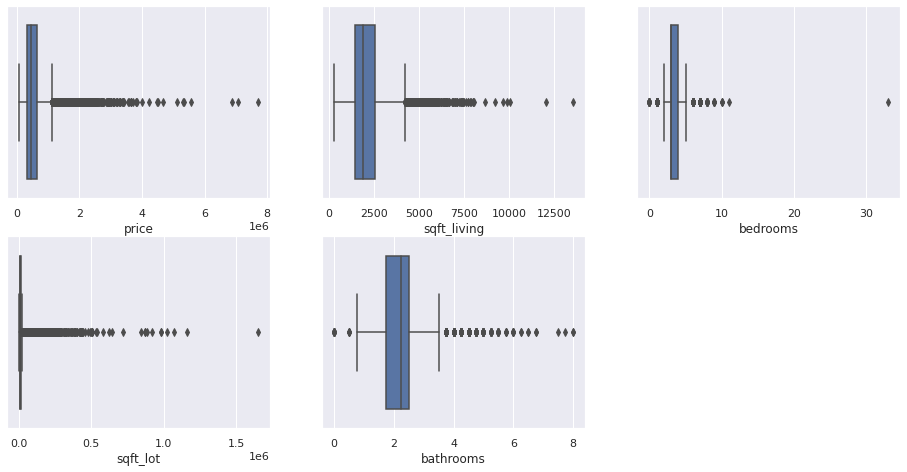

In [95]:
# create a boxplot to visualize the outliers
#plotting  a boxplot to check the outliers
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df1.price)
plt.subplot(332)
sns.boxplot(df1.sqft_living)
plt.subplot(333)
sns.boxplot(df1.bedrooms)
plt.subplot(334)
sns.boxplot(df1.sqft_lot)
plt.subplot(335)
sns.boxplot(df1.bathrooms)

What observations can you make? What actions are you going to take next?

- As is evident from the figure most of the houses have 3- 4 bedrooms
- Removing outliers could potentially lead to a biased sample. Furthermore, it could also make the results of the predicting algorithm completely meaningless as the results would not apply to any prospectively definable population.

In [96]:
print('Original dataset:',len(df1))
# Removing outliers from dataframe
df1 = df1[df1.price < 4000000]
df1 = df1[df1.sqft_living < 6000]
df1 = df1[df1.sqft_lot < 500000]
df1 = df1[df1.bedrooms < 5]
df1 = df1[df1.bathrooms < 4]
print('After removing outliers:',len(df1))

Original dataset: 21613
After removing outliers: 19478


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac3ff99410>,
      dtype=object)

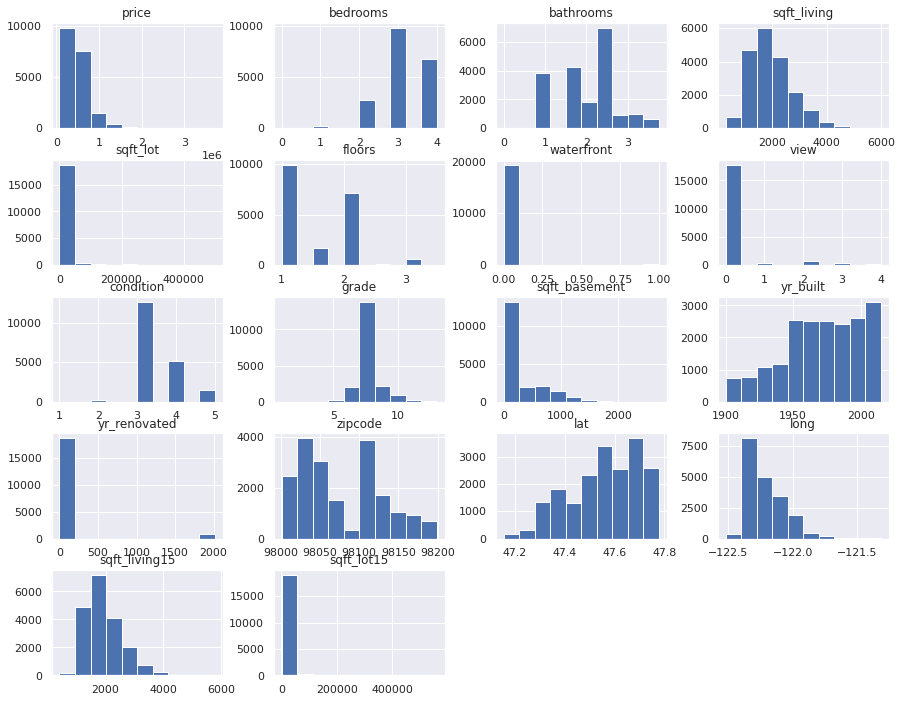

In [46]:
#plotting histgram of the dataframe after the removing the outliers
df1.hist(figsize=(15,12))

### 3.3 Checking multicollinearity

In [97]:
# calculating correlations
corr = df1.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.271834,0.453441,0.655972,0.089584,0.245056,0.240436,0.373582,0.049323,0.652417,0.549083,0.277677,0.038662,0.130773,-0.025318,0.352273,0.016686,0.583274,0.074101
bedrooms,0.271834,1.000000,0.490926,0.566786,0.041315,0.194615,-0.027189,0.035027,0.019791,0.383965,0.497549,0.196501,0.223809,-0.000365,-0.194363,-0.053897,0.182334,0.410628,0.035127
bathrooms,0.453441,0.490926,1.000000,0.706171,0.076366,0.524109,0.038639,0.130426,-0.134315,0.644810,0.641667,0.203959,0.554060,0.033202,-0.217052,0.001648,0.241216,0.542618,0.068879
sqft_living,0.655972,0.566786,0.706171,1.000000,0.192849,0.349601,0.078609,0.237570,-0.062560,0.750785,0.868418,0.364396,0.340611,0.047727,-0.204714,0.033458,0.260607,0.763438,0.179594
sqft_lot,0.089584,0.041315,0.076366,0.192849,1.000000,-0.022802,0.022195,0.075271,-0.016215,0.117177,0.202066,0.005304,0.064142,0.014042,-0.148459,-0.097948,0.258578,0.181948,0.783745
floors,0.245056,0.194615,0.524109,0.349601,-0.022802,1.000000,0.012878,0.005873,-0.266813,0.453438,0.516301,-0.272090,0.510843,-0.002614,-0.060232,0.048250,0.120403,0.266043,-0.025327
waterfront,0.240436,-0.027189,0.038639,0.078609,0.022195,0.012878,1.000000,0.401901,0.017148,0.067951,0.047444,0.067750,-0.032262,0.091991,0.038390,-0.020687,-0.050546,0.075640,0.037387
view,0.373582,0.035027,0.130426,0.237570,0.075271,0.005873,0.401901,1.000000,0.047127,0.209933,0.117042,0.254228,-0.070950,0.104988,0.100597,0.000323,-0.090696,0.248569,0.067729
condition,0.049323,0.019791,-0.134315,-0.062560,-0.016215,-0.266813,0.017148,0.047127,1.000000,-0.149111,-0.162369,0.180118,-0.357112,-0.059969,0.000232,-0.015538,-0.102455,-0.094868,-0.006799
grade,0.652417,0.383965,0.644810,0.750785,0.117177,0.453438,0.067951,0.209933,-0.149111,1.000000,0.738132,0.111806,0.459730,0.006595,-0.175817,0.110384,0.195273,0.694734,0.106787


The table above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself.

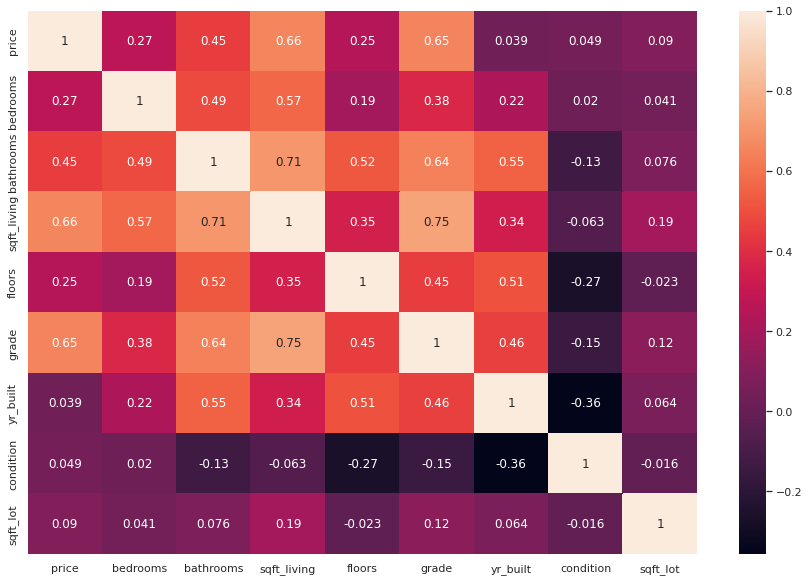

In [98]:
# create a heatmap of the correlations
# Heat map showing co-relationship between variables

plt.figure(figsize=(15,10))
columns =['price','bedrooms','bathrooms','sqft_living','floors','grade','yr_built','condition','sqft_lot']
sns.heatmap(df1[columns].corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


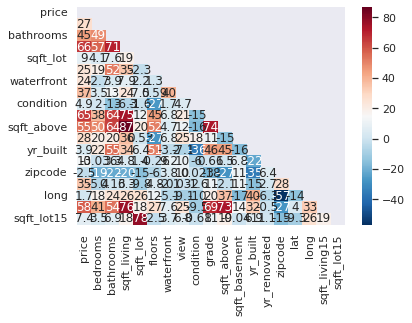

In [99]:
# mask out upper triangle
mask = np.zeros_like(df1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# heatmap
sns.heatmap(df1.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

- The rectangle block of red suggests that the  features tend to correlate pretty well with each other. For instance, sqft_above, grade, sqft_living and sqft_living15 are all highly correlated. This multicollinearity might affect model performance, as regression features should be independent.

- There is strong correlation between sqft_living and sqft_above, it would be reasonable to remove one of them.

In [100]:
#dropping the sqft_above column
df1.drop(columns=["sqft_above"], inplace= True)

In [101]:
#Calculate the correlation coefficients for the columns that seem to correlate well with Price
abs_corr_coeffs = df1.corr()['price'].abs().sort_values(ascending=False)
abs_corr_coeffs

price            1.000000
sqft_living      0.655972
grade            0.652417
sqft_living15    0.583274
bathrooms        0.453441
view             0.373582
lat              0.352273
sqft_basement    0.277677
bedrooms         0.271834
floors           0.245056
waterfront       0.240436
yr_renovated     0.130773
sqft_lot         0.089584
sqft_lot15       0.074101
condition        0.049323
yr_built         0.038662
zipcode          0.025318
long             0.016686
Name: price, dtype: float64

In [102]:
 #calculating correlations
corr = df1.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.271834,0.453441,0.655972,0.089584,0.245056,0.240436,0.373582,0.049323,0.652417,0.277677,0.038662,0.130773,-0.025318,0.352273,0.016686,0.583274,0.074101
bedrooms,0.271834,1.000000,0.490926,0.566786,0.041315,0.194615,-0.027189,0.035027,0.019791,0.383965,0.196501,0.223809,-0.000365,-0.194363,-0.053897,0.182334,0.410628,0.035127
bathrooms,0.453441,0.490926,1.000000,0.706171,0.076366,0.524109,0.038639,0.130426,-0.134315,0.644810,0.203959,0.554060,0.033202,-0.217052,0.001648,0.241216,0.542618,0.068879
sqft_living,0.655972,0.566786,0.706171,1.000000,0.192849,0.349601,0.078609,0.237570,-0.062560,0.750785,0.364396,0.340611,0.047727,-0.204714,0.033458,0.260607,0.763438,0.179594
sqft_lot,0.089584,0.041315,0.076366,0.192849,1.000000,-0.022802,0.022195,0.075271,-0.016215,0.117177,0.005304,0.064142,0.014042,-0.148459,-0.097948,0.258578,0.181948,0.783745
floors,0.245056,0.194615,0.524109,0.349601,-0.022802,1.000000,0.012878,0.005873,-0.266813,0.453438,-0.272090,0.510843,-0.002614,-0.060232,0.048250,0.120403,0.266043,-0.025327
waterfront,0.240436,-0.027189,0.038639,0.078609,0.022195,0.012878,1.000000,0.401901,0.017148,0.067951,0.067750,-0.032262,0.091991,0.038390,-0.020687,-0.050546,0.075640,0.037387
view,0.373582,0.035027,0.130426,0.237570,0.075271,0.005873,0.401901,1.000000,0.047127,0.209933,0.254228,-0.070950,0.104988,0.100597,0.000323,-0.090696,0.248569,0.067729
condition,0.049323,0.019791,-0.134315,-0.062560,-0.016215,-0.266813,0.017148,0.047127,1.000000,-0.149111,0.180118,-0.357112,-0.059969,0.000232,-0.015538,-0.102455,-0.094868,-0.006799
grade,0.652417,0.383965,0.644810,0.750785,0.117177,0.453438,0.067951,0.209933,-0.149111,1.000000,0.111806,0.459730,0.006595,-0.175817,0.110384,0.195273,0.694734,0.106787


What have you noticed? What actions are you going to take next regarding this?
- The table above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the inverse of the matrix above.

In [103]:
# check VIF scores
# Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the inverse of the matrix above.
#we create a new dataframe with the inverse of the matrix above.


pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,3.273502,0.229585,-0.199667,-1.093311,-0.071080,-0.139914,-0.405865,-0.395272,-0.216721,-1.133378,0.019695,0.725080,-0.115079,0.254999,-0.898666,0.229467,-0.338942,0.084809
bedrooms,0.229585,1.613043,-0.399032,-0.992630,0.067844,0.084259,0.031723,0.084467,-0.093942,0.091578,0.073291,0.113971,0.026560,0.096821,0.021385,0.016674,0.007659,0.066529
bathrooms,-0.199667,-0.399032,3.079012,-0.906567,0.023986,-0.731551,0.030518,0.008707,-0.134985,-0.216316,-0.469117,-0.991952,-0.239188,0.043172,0.033129,0.005261,0.012535,0.039191
sqft_living,-1.093311,-0.992630,-0.906567,5.801378,-0.270173,-0.542672,0.055119,0.192610,0.095058,-1.189626,-1.344123,0.209408,-0.012017,-0.186050,0.495019,-0.450205,-1.687583,-0.114055
sqft_lot,-0.071080,0.067844,0.023986,-0.270173,2.654296,0.083190,0.060040,-0.061638,0.045581,-0.012975,0.067295,0.060074,0.007658,-0.016125,0.089320,-0.170982,0.125140,-2.002587
floors,-0.139914,0.084259,-0.731551,-0.542672,0.083190,2.076647,0.015014,-0.029363,0.107398,-0.136329,0.870337,-0.531283,-0.069048,-0.185213,-0.105163,0.182118,0.330753,0.049365
waterfront,-0.405865,0.031723,0.030518,0.055119,0.060040,0.015014,1.254223,-0.440775,0.012823,0.166707,0.052332,-0.113319,-0.050867,-0.013617,0.130004,0.005022,0.080265,-0.062624
view,-0.395272,0.084467,0.008707,0.192610,-0.061638,-0.029363,-0.440775,1.455253,0.001987,-0.038151,-0.270724,0.053873,-0.032680,-0.170020,0.228867,0.037987,-0.284785,-0.003272
condition,-0.216721,-0.093942,-0.134985,0.095058,0.045581,0.107398,0.012823,0.001987,1.264852,0.034394,-0.113806,0.520145,0.213473,0.148953,0.115823,-0.019121,0.123282,-0.040319
grade,-1.133378,0.091578,-0.216316,-1.189626,-0.012975,-0.136329,0.166707,-0.038151,0.034394,3.572307,0.345614,-0.880873,-0.023404,-0.027052,-0.030451,0.304029,-0.673891,0.034046


Interpreting the table is straightforward: The VIF score for each variable was not found alongside the downwards sloping diagonal. 
CGPA should have a value nearing 5, No need to improve VIF scores

## <font color='#2F4F4F'>4. Data Modeling</font>

In [104]:
# split into features (X) and label (Y)

# Building our model using different regression models

# Data Preparation for fitting data into model
df1.info()
df1.head(10)

df2 = df1.drop(['Rating'],axis=1)

df2['bathrooms'] = df2['bathrooms'].apply(np.int64)
df2['price'] = df2['price'].apply(np.int64)
df2['floors'] = df2['floors'].apply(np.int64)

df2.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 19478 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19478 non-null  float64
 1   bedrooms       19478 non-null  int64  
 2   bathrooms      19478 non-null  float64
 3   sqft_living    19478 non-null  int64  
 4   sqft_lot       19478 non-null  int64  
 5   floors         19478 non-null  float64
 6   waterfront     19478 non-null  int64  
 7   view           19478 non-null  int64  
 8   condition      19478 non-null  int64  
 9   grade          19478 non-null  int64  
 10  sqft_basement  19478 non-null  int64  
 11  yr_built       19478 non-null  int64  
 12  yr_renovated   19478 non-null  int64  
 13  zipcode        19478 non-null  int64  
 14  lat            19478 non-null  float64
 15  long           19478 non-null  float64
 16  sqft_living15  19478 non-null  int64  
 17  sqft_lot15     19478 non-null  int64  
 18  Rating

- I decicided to pick coefficent for price  above 0.4 

#Calculate the correlation coefficients for the columns that seem to correlate well with Price


In [111]:
#Calculate the correlation coefficients for the columns that seem to correlate well with Price
abs_corr_coeffs = df2.corr()['price'].abs().sort_values(ascending=False)
abs_corr_coeffs

price            1.000000
sqft_living      0.655972
grade            0.652417
sqft_living15    0.583274
bathrooms        0.423080
view             0.373582
lat              0.352273
sqft_basement    0.277677
bedrooms         0.271834
waterfront       0.240436
floors           0.222575
yr_renovated     0.130773
sqft_lot         0.089584
sqft_lot15       0.074101
condition        0.049323
yr_built         0.038662
zipcode          0.025318
long             0.016686
Name: price, dtype: float64

In [112]:
# X(Independent variables) and y(target variables) 
import statsmodels.formula as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = df2.drop(['price'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
model_1 = ols(formula= f, data = df2).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2612.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        16:10:39   Log-Likelihood:            -2.6135e+05
No. Observations:               19478   AIC:                         5.227e+05
Df Residuals:                   19460   BIC:                         5.229e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       4.52e+05   2.51e+06      0.180      0.857   -4.47e+06    5.37e+06
bedrooms      -2.823e+04   2064.323    -13.677      0.000   -3.23e+04   -2.42e+04
bathrooms      3.359e+04   2687.960     12.497      0.000    2.83e+04    3.89e+04
sqft_living     125.9287      3.425     36.770      0.000     119.216     132.642
sqft_lot          0.1963      0.060      3.278      0.001       0.079       0.314
floors         1.733e+04   3148.695      5.503      0.000    1.12e+04    2.35e+04
waterfront     4.518e+05   1.58e+04     28.671      0.000    4.21e+05    4.83e+05
view           4.961e+04   1926.902     25.747      0.000    4.58e+04    5.34e+04
condition      3.035e+04   2000.747     15.167      0.000    2.64e+04    3.43e+04
grade          9.215e+04   1870.306     49.269      0.000    8.85e+04    9.58e+04
sqft_basement    -6.7246      3.953     -1.701      0.089     -14.473       1.024
yr_built      -2220.2536     63.739    -34.833      0.000   -2345.188   -2095.319
yr_renovated     26.1003      3.167      8.240      0.000      19.892      32.309
zipcode        -427.3617     28.200    -15.155      0.000    -482.636    -372.087
lat            5.778e+05   9069.132     63.711      0.000     5.6e+05    5.96e+05
long           -1.45e+05   1.11e+04    -13.082      0.000   -1.67e+05   -1.23e+05
sqft_living15    47.3213      3.137     15.085      0.000      41.173      53.470
sqft_lot15       -0.2984      0.075     -3.999      0.000      -0.445      -0.152
==============================================================================
Omnibus:                    10682.085   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           212064.830
Skew:                           2.214   Prob(JB):                         0.00
Kurtosis:                      18.547   Cond. No.                     2.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
#Fuction for the linear regression
def linear_regression(df):

    data = df2.copy()

    y = data['price']
    X = data.drop(['price'], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    print(len(X_test))

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)


    mse_train = mean_squared_error(y_train, y_hat_train)
    mse_test = mean_squared_error(y_test, y_hat_test)

    print('Train MSE:', mse_train)
    print('Test MSE:', mse_test)

    print('RMSE Train:', np.sqrt(mse_train))
    print('RMSE Test:', np.sqrt(mse_test))

    print('R2 Score:', round(r2_score(y_test, y_hat_test),3))

    residuals = (y_test - y_hat_test)

    statsmodels.graphics.gofplots.qqplot(residuals, line = "r")
    return (linreg)


3896
Train MSE: 26307582192.48393
Test MSE: 26891302417.591713
RMSE Train: 162196.12261852602
RMSE Test: 163985.6774770032
R2 Score: 0.68


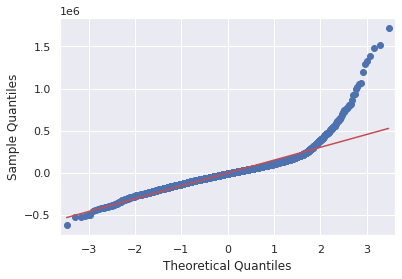

In [114]:
# fit regressor to data and make predictions

#calling linear_regression on base dataframe and normality using qqplot
linreg = linear_regression(df2)


- Once we fit the model, then we have to print all coefficients

In [115]:
print(linreg.intercept_)

1220715.395538252


- scatter plot

In [ ]:
plt.scatter(model_1.predict(df[x_cols]), model_1.resid)
plt.plot(model_1.predict(df[x_cols]), [0 for i in range(len(df))])

In [ ]:
Checking for Homoscedasticity

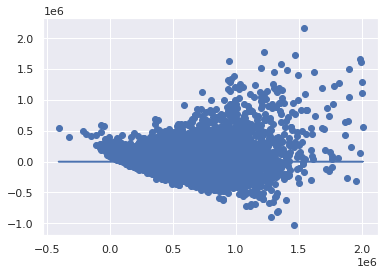

In [120]:
#Checking for Homoscedasticity
plt.scatter(model_1.predict(df2[x_cols]), model_1.resid)
plt.plot(model_1.predict(df2[x_cols]), [0 for i in range(len(df2))])

_ This displays a fairly 'funnel' shape: errors appear to increase as the price increases. This is not well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

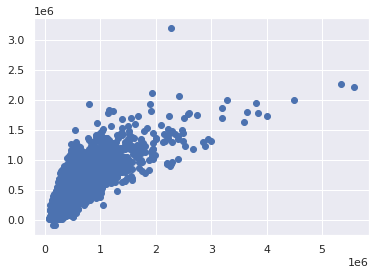

In [33]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data is in line shape, which means our model has done good predictions

In [122]:
#copy data frame
df3 =df2.copy()

**Model_2 :Dealing with outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

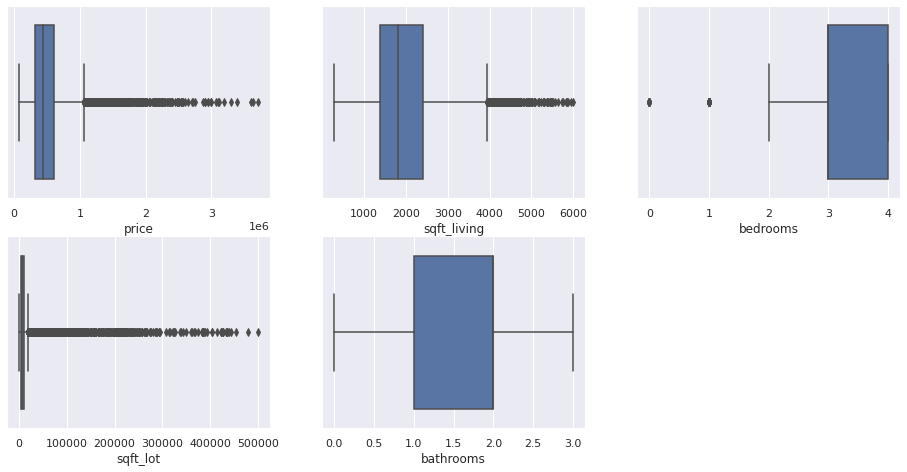

In [123]:
#plotting  a boxplot to check the outliers
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df3.price)
plt.subplot(332)
sns.boxplot(df3.sqft_living)
plt.subplot(333)
sns.boxplot(df3.bedrooms)
plt.subplot(334)
sns.boxplot(df3.sqft_lot)
plt.subplot(335)
sns.boxplot(df3.bathrooms)

- Observing the above boxplot eliminating the outliers in the features as below

In [125]:
print('Original dataset:',len(df3))
# Removing outliers from dataframe
df3 = df3[df3.price < 4000010]
df3 = df3[df3.sqft_living < 5000]
df3 = df3[df3.sqft_lot < 500000]
df3 = df3[df3.bedrooms < 5]
df3 = df3[df3.bathrooms < 4]
print('After removing outliers:',len(df1))

Original dataset: 19478
After removing outliers: 19478


In [126]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19435 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19435 non-null  int64  
 1   bedrooms       19435 non-null  int64  
 2   bathrooms      19435 non-null  int64  
 3   sqft_living    19435 non-null  int64  
 4   sqft_lot       19435 non-null  int64  
 5   floors         19435 non-null  int64  
 6   waterfront     19435 non-null  int64  
 7   view           19435 non-null  int64  
 8   condition      19435 non-null  int64  
 9   grade          19435 non-null  int64  
 10  sqft_basement  19435 non-null  int64  
 11  yr_built       19435 non-null  int64  
 12  yr_renovated   19435 non-null  int64  
 13  zipcode        19435 non-null  int64  
 14  lat            19435 non-null  float64
 15  long           19435 non-null  float64
 16  sqft_living15  19435 non-null  int64  
 17  sqft_lot15     19435 non-null  int64  
dtypes: flo

- plotting histgram of the dataframe after the removing the outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac2e28a610>,
      dtype=object)

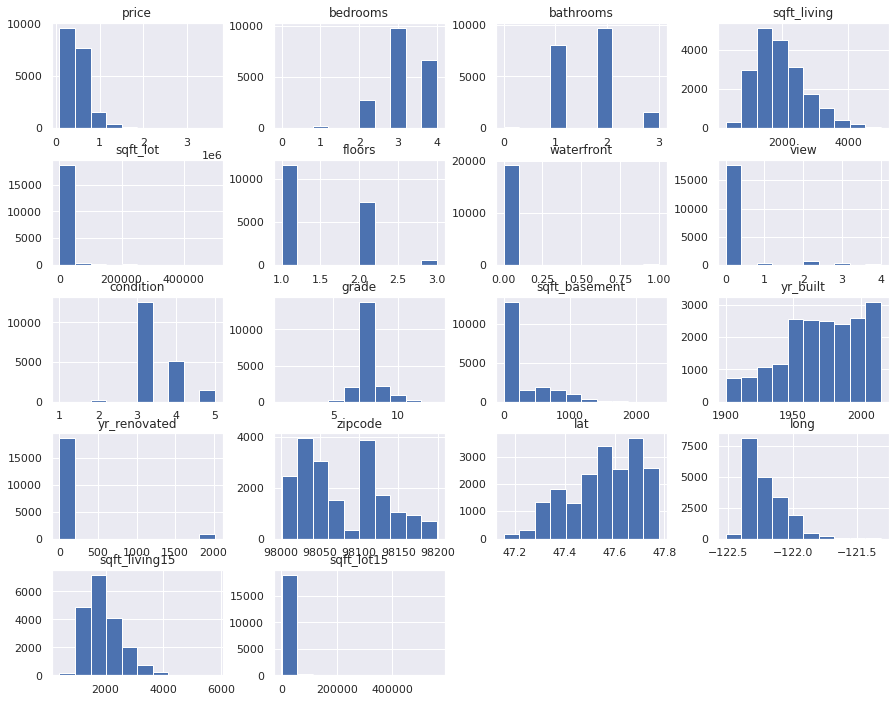

In [127]:
#plotting histgram of the dataframe after the removing the outliers
df3.hist(figsize=(15,12))

In [128]:
outcome = 'price'
x_cols = df1.drop(['price'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
model_2 = ols(formula= f, data = df1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2508.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        16:30:18   Log-Likelihood:            -2.6123e+05
No. Observations:               19478   AIC:                         5.225e+05
Df Residuals:                   19459   BIC:                         5.226e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.901e+06    2.5e+06      0.761      0.446   -2.99e+06    6.79e+06
Rating[T.Good]   7.69e+04   4612.959     16.671      0.000    6.79e+04    8.59e+04
bedrooms       -2.366e+04   2095.925    -11.289      0.000   -2.78e+04   -1.96e+04
bathrooms       2.955e+04   2973.108      9.939      0.000    2.37e+04    3.54e+04
sqft_living      116.7109      3.488     33.465      0.000     109.875     123.547
sqft_lot           0.1985      0.060      3.335      0.001       0.082       0.315
floors          2.203e+04   3076.767      7.160      0.000     1.6e+04    2.81e+04
waterfront      4.471e+05   1.57e+04     28.539      0.000    4.16e+05    4.78e+05
view            4.855e+04   1916.605     25.333      0.000    4.48e+04    5.23e+04
condition       3.121e+04   1994.972     15.645      0.000    2.73e+04    3.51e+04
grade           1.062e+05   2050.962     51.802      0.000    1.02e+05     1.1e+05
sqft_basement      4.2270      4.072      1.038      0.299      -3.755      12.209
yr_built       -2101.1822     63.450    -33.116      0.000   -2225.549   -1976.815
yr_renovated      28.0618      3.157      8.888      0.000      21.873      34.250
zipcode         -454.4283     28.108    -16.167      0.000    -509.522    -399.335
lat              5.84e+05   9032.604     64.650      0.000    5.66e+05    6.02e+05
long           -1.496e+05    1.1e+04    -13.575      0.000   -1.71e+05   -1.28e+05
sqft_living15     43.9060      3.135     14.007      0.000      37.762      50.050
sqft_lot15        -0.3014      0.074     -4.064      0.000      -0.447      -0.156
==============================================================================
Omnibus:                    10564.512   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           208094.417
Skew:                           2.182   Prob(JB):                         0.00
Kurtosis:                      18.406   Cond. No.                     2.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3896
Train MSE: 26461276955.944687
Test MSE: 26258338665.460133
RMSE Train: 162669.2255958228
RMSE Test: 162044.24909715288
R2 Score: 0.702


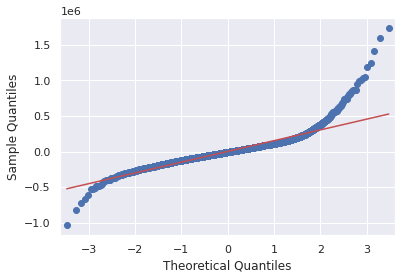

In [129]:
#calling function linear_regression

linreg = linear_regression(df3)

# Checking for Homoscedasticity

### 4.1 Test for normality and homoscedasticity


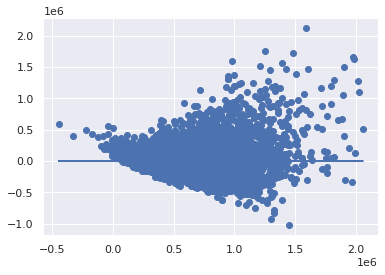

In [130]:
# Checking for Homoscedasticity
plt.scatter(model_2.predict(df1[x_cols]), model_2.resid)
plt.plot(model_2.predict(df1[x_cols]), [0 for i in range(len(df1))])

-  R value of this model with statsmodels 69% .
- R value of this model with sci=kit learn 69%.

---



# evaluate RMSE and r-squared scores

In [131]:

#Import library 
from sklearn import metrics

In [132]:
#evaluate RMSE and r-squared scores
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 161042.10193718094
MSE: 61377475318.600655
RMSE: 247744.77858998493


What conclusions have you drawn?
- After making necessary cleaning and modification of our data, model-4 performs with 75% accuracy across all of the data.

- Selected important features and rejected the ones that can negatively impact result of the prediction.

- Location and size of the house have biggest impact on house price.

In [ ]:
import scipy as sp

# using the scipy bartlett function to get our test result and p-value
YOUR CODE HERE

# computing the critical value of a chi-squared distribution
degree_of_freedom = len(y_pred) - 1
prob = 1 - p_value
critical_value = sp.stats.chi2.ppf(prob, degree_of_freedom)

print("Critical value:", critical_value)

If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.

In [ ]:
if (test_result > critical_value):
    print(" The variances are heterogeneous (unequal), and the model needs to be reassessed.")
else:
    print('The variances are homogeneous (equal).')

### 4.2 Boosting

We can try boosting to see if it will improve our model. We will experiment with 3 types of boosting:
- Ada Boosting
- Gradient Boosting
- eXtreme Gradient (XG) Boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# creating a list of learning rates to use as hyperparameters
learning_rates = [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# setting up our Ada booster
for lr in learning_rates:
    ada = AdaBoostRegressor(learning_rate = lr, random_state = 0)
    ada.fit(X_train, y_train)
    ada_predict = ada.predict(X_test)
    print("Ada Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, ada_predict)))
    print()
    
print("***************************************************") 

# setting up our Gradient booster
for lr in learning_rates:
    gradient = GradientBoostingRegressor(learning_rate = lr, random_state = 0)
    gradient.fit(X_train, y_train)
    gradient_predict = gradient.predict(X_test)
    print("Gradient Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, gradient_predict)))
    print()

print("***************************************************")

# setting up our XG booster
for lr in learning_rates:
    xgbr = XGBRegressor(learning_rate = lr, random_state = 0)
    xgbr.fit(X_train, y_train)
    xgbr_predict = xgbr.predict(X_test)
    print("XG Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, xgbr_predict)))
    print()

In [ ]:
print("Ada Boosting R-squared Score:", metrics.r2_score(y_test, ada_predict))
print("Gradient Boosting R-squared Score:", metrics.r2_score(y_test, gradient_predict))
print("XG Boosting R-squared Score:", metrics.r2_score(y_test, xgbr_predict))

From the above analysis, we see that XG Boosting with a learning rate of 0.1 returned the lowest RMSE score (125,974). Although still higher than 10% of the target variable mean, it is a better score than that of the original linear regression. Also, the r-squared score of XG Boosting is 0.8 which means it fits about 80% of our data, which is much better than for linear regression.

## <font color='#2F4F4F'>5. Summary of Findings</font>

Our dataset met most of the assumptions for multiple linear regression such as normality and homoscedasticity. However, the assumptions on linearity, multicollinearity, and outliers were not fully met, thereby proving to be a poor data for multiple linear regression.

With XG Boosting, the model fit to about 80% of the data, thereby meeting our metric for success.

## <font color='#2F4F4F'>6. Recommendations</font>

I would recommend that Knightly Frankly use XG Boost Regressor rather than Multiple Linear Regression to predict the prices of the houses.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
Yes.

#### b) Did we have the right data?
Yes.

#### c) What can be done to improve the solution?
Apart from carrying out hyperparameter tuning, we can implement cross validation. Alternatively, we can try out other regression analysis models.